#Import Data and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
import joblib


In [2]:
#read heart dataset
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [3]:
import numpy
print(numpy.__version__)


2.0.2


#Data exploration

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

#Data Describtion

This dataset captures detailed information about passengers’ experiences, behaviors, and satisfaction with their flights. Each column represents a different aspect of the journey, reflecting both objective measurements (such as delays and distance) and subjective ratings (such as comfort and service quality).

• id: A unique integer identifier assigned to each passenger record, ensuring traceability and data integrity across analyses.

• Gender: A categorical variable (Male, Female) identifying the passenger’s gender, which may influence service expectations and satisfaction.

• Customer Type: Indicates whether the passenger is a returning loyal customer or a disloyal customer, capturing the relationship history and potential bias toward the airline.

• Age: The passenger’s age in years; age groups often have distinct preferences and sensitivities to in-flight services.

• Type of Travel: Specifies the purpose of the trip—Business travel or Personal Travel—highlighting different priorities, such as punctuality for business travelers and comfort for personal travelers.

• Class: The booking class (Eco, Eco Plus, Business) that determines seating, amenities, and overall service level, strongly affecting comfort, entertainment, and satisfaction.

• Flight Distance: The total flight distance in miles; longer flights can magnify the impact of both positive and negative service attributes.

• Inflight wifi service: An ordinal rating from 0 to 5 assessing the availability, speed, and reliability of onboard Wi-Fi, crucial for productivity and entertainment.

• Departure/Arrival time convenient: An ordinal rating (0–5) reflecting how well the flight schedule aligned with the passenger’s needs, affecting overall satisfaction.

• Ease of Online booking: A subjective rating (0–5) measuring the simplicity and efficiency of the airline’s online reservation system.

• Gate location: An ordinal score (0–5) for the convenience of the departure/arrival gate’s location within the airport, influencing stress and transit time.

• Food and drink: An ordinal score (0–5) capturing passenger satisfaction with in-flight meals and beverages, which contributes to overall comfort and enjoyment.

• Online boarding: A rating (0–5) for the ease and speed of the online check-in and boarding procedures, reflecting digital service quality.

• Seat comfort: An ordinal rating (0–5) of the physical comfort provided by the seating, including cushion, width, and recline functionality.

• Inflight entertainment: An ordinal score (0–5) evaluating the range, quality, and reliability of entertainment options available during the flight.

• On-board service: A subjective rating (0–5) for the attentiveness, professionalism, and courtesy of the flight crew throughout the journey.

• Leg room service: An ordinal measure (0–5) of the space available for leg movement, essential for comfort on longer flights.

• Baggage handling: A rating (0–5) assessing the efficiency and care with which checked luggage is managed, from loading to baggage claim.

• Checkin service: An ordinal score (0–5) for the quality and speed of the airport check-in counters and staff.

• Inflight service: A broad rating (0–5) summarizing all other in-flight services, including beverage service, cabin announcements, and any special assistance.

• Cleanliness: An ordinal rating (0–5) evaluating the hygiene and tidiness of the cabin, lavatories, and seating areas.

• Departure Delay in Minutes: A non-negative integer indicating the number of minutes the flight departed behind schedule, reflecting operational performance.

• Arrival Delay in Minutes: A non-negative integer capturing the delay experienced upon arrival, directly impacting passenger satisfaction and downstream connections.

• satisfaction: The target categorical outcome ("neutral or dissatisfied", "satisfied"), representing the passenger’s overall appraisal of their flight experience, synthesizing all the above factors into a single evaluation.



In [8]:
df.describe(include = 'object').T

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


#Data Analysis and visualization

this will show us the most gender in air plane travels

<Axes: xlabel='Gender', ylabel='count'>

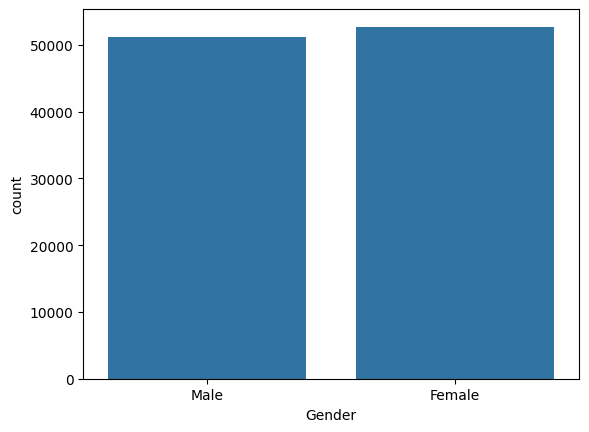

In [9]:
sns.countplot(data=df, x='Gender')


"Is there a specific age group that travels more than others?"

<Axes: xlabel='Age', ylabel='Count'>

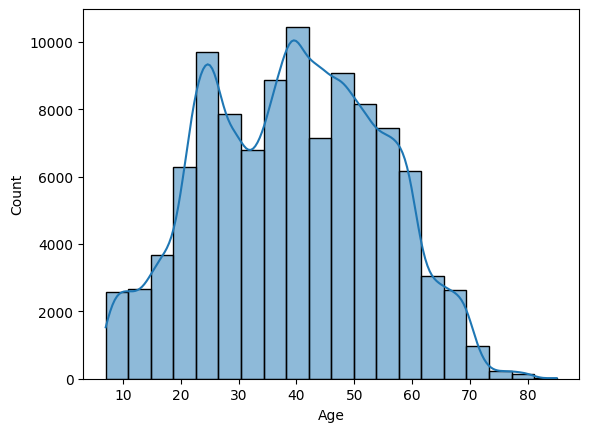

In [10]:
sns.histplot(data=df, x='Age', bins=20, kde=True)


This will show us the effect of each service in Satisfaction

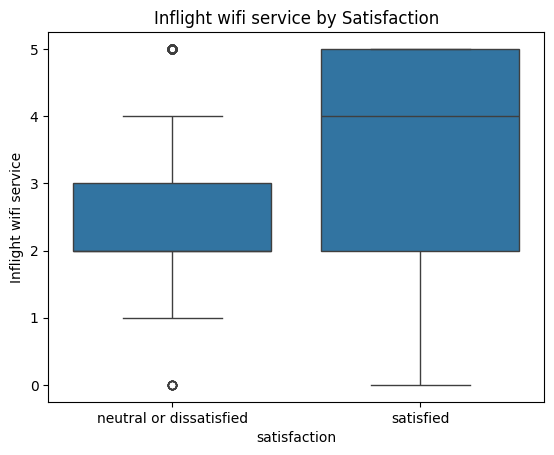

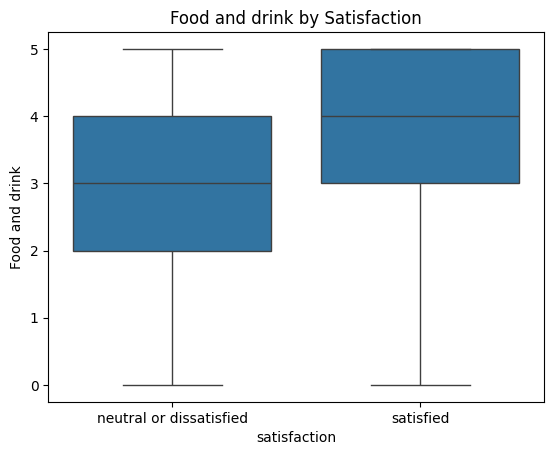

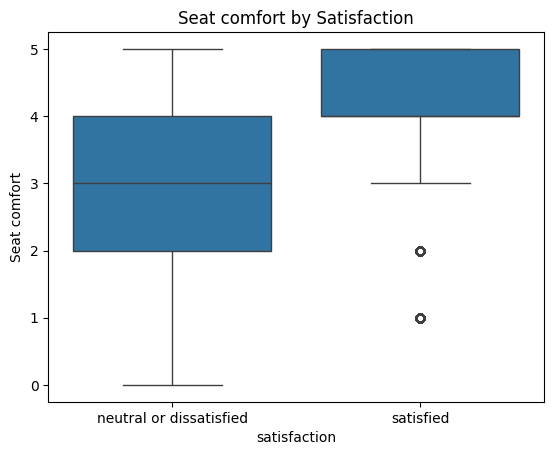

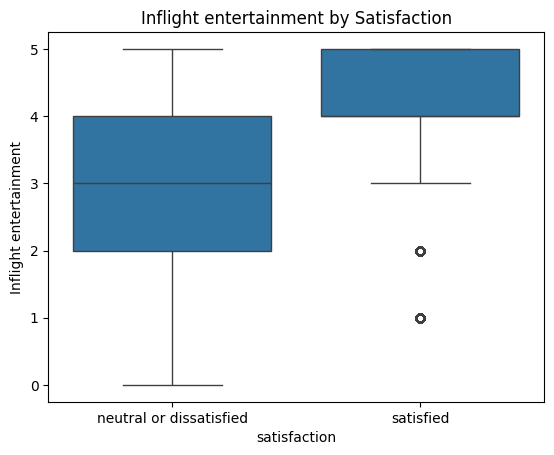

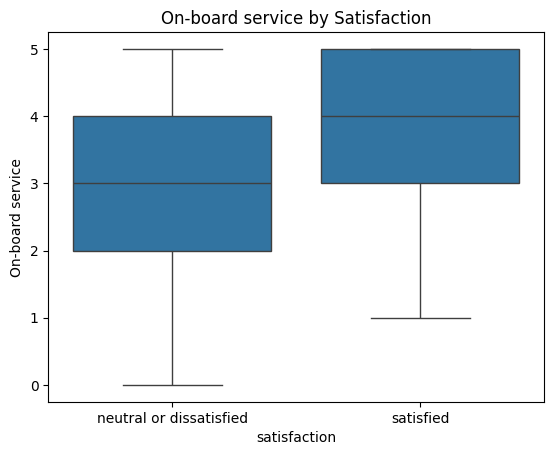

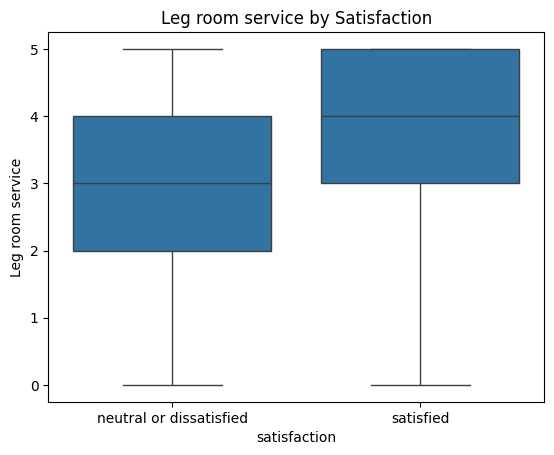

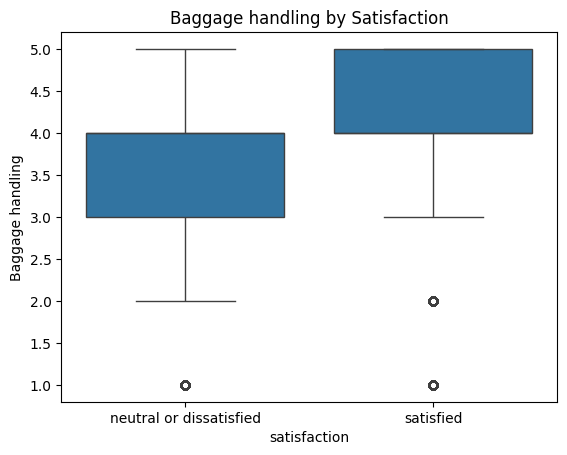

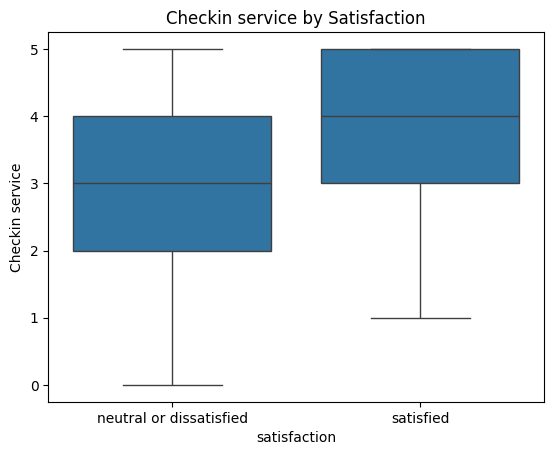

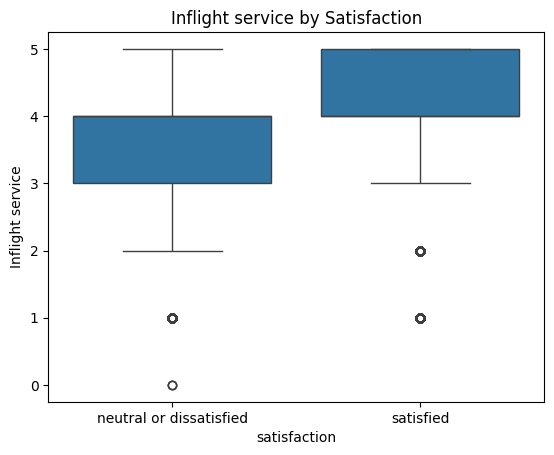

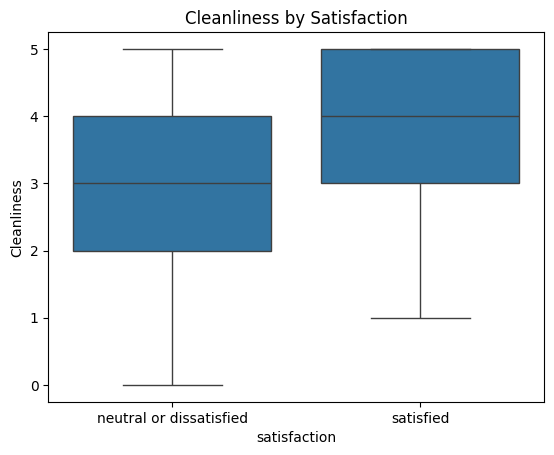

In [11]:
cols = ['Inflight wifi service', 'Food and drink', 'Seat comfort',
        'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

for col in cols:
    sns.boxplot(data=df, x='satisfaction', y=col)
    plt.title(f'{col} by Satisfaction')
    plt.show()


this plot shows the distribution of total delay for two groups of passengers based on their satisfaction:

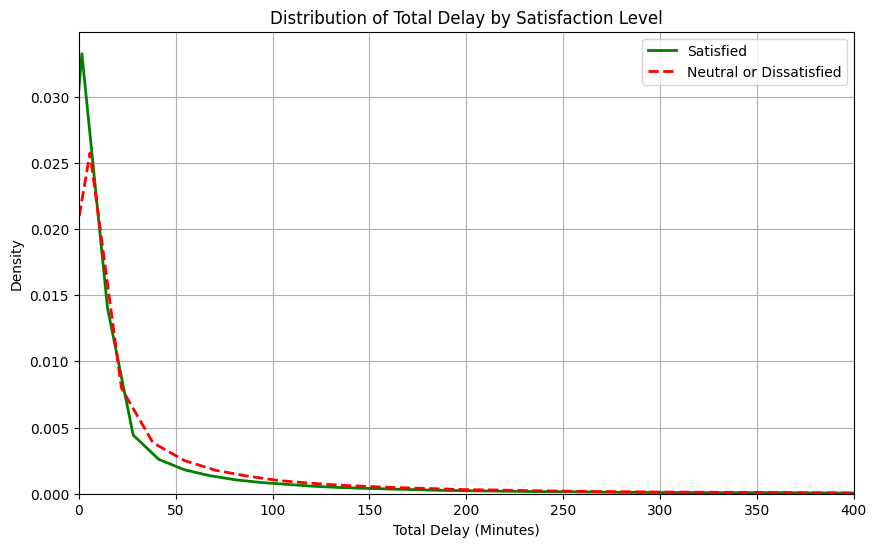

In [12]:


plt.figure(figsize=(10, 6))

sns.kdeplot(
    x=df[df['satisfaction'] == 'satisfied']['Departure Delay in Minutes'] +
      df[df['satisfaction'] == 'satisfied']['Arrival Delay in Minutes'],
    label='Satisfied',
    color='green',
    linestyle='-',
    linewidth=2
)

sns.kdeplot(
    x=df[df['satisfaction'] == 'neutral or dissatisfied']['Departure Delay in Minutes'] +
      df[df['satisfaction'] == 'neutral or dissatisfied']['Arrival Delay in Minutes'],
    label='Neutral or Dissatisfied',
    color='red',
    linestyle='--',
    linewidth=2
)

plt.title('Distribution of Total Delay by Satisfaction Level')
plt.xlabel('Total Delay (Minutes)')
plt.ylabel('Density')
plt.xlim(0, 400)
plt.legend()
plt.grid(True)
plt.savefig("plot2.png", bbox_inches='tight', facecolor='white')
plt.show()


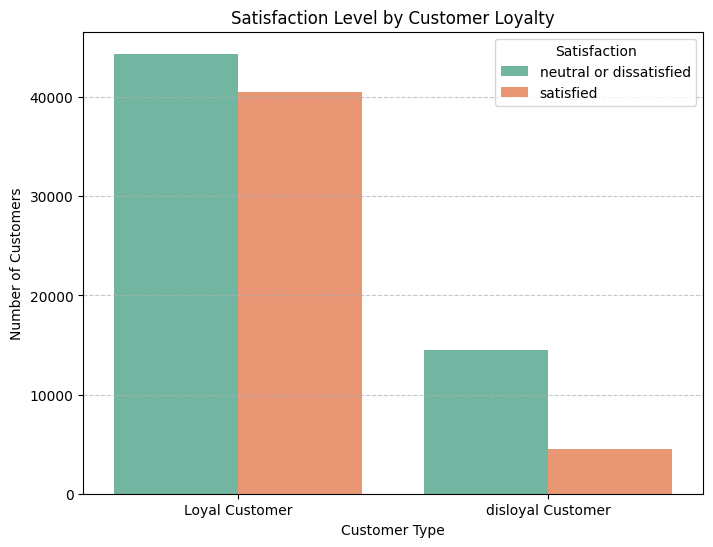

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Customer Type', hue='satisfaction', palette='Set2')

plt.title('Satisfaction Level by Customer Loyalty')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.legend(title='Satisfaction')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.savefig("plot1.png", bbox_inches='tight', facecolor='white')
plt.show()


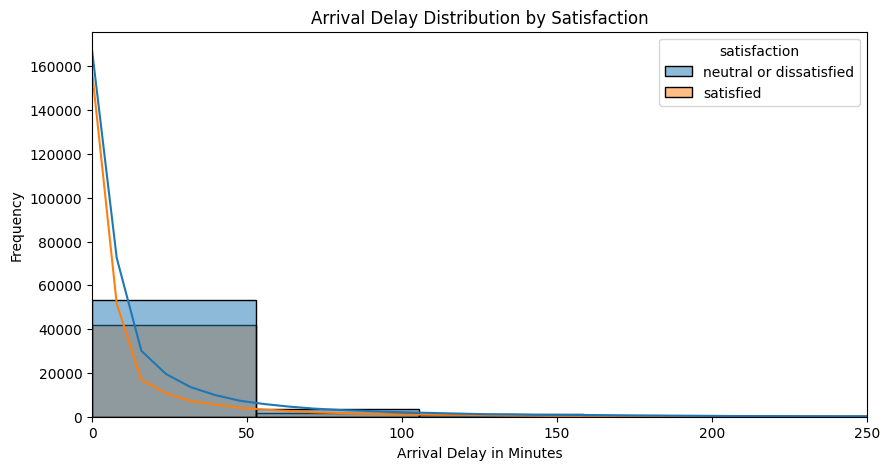

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Arrival Delay in Minutes', hue='satisfaction', kde=True, bins=30)

# Limit x-axis range
plt.xlim(0, 250)

plt.title('Arrival Delay Distribution by Satisfaction')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Frequency')
plt.savefig("plot.png", bbox_inches='tight', facecolor='white')
plt.show()


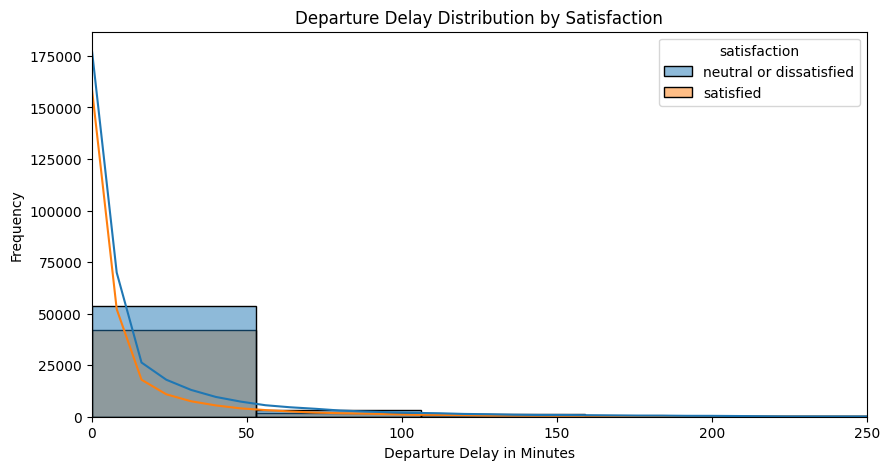

<Figure size 640x480 with 0 Axes>

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Departure Delay in Minutes', hue='satisfaction', kde=True, bins=30)


plt.xlim(0, 250)

plt.title('Departure Delay Distribution by Satisfaction')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Frequency')
plt.show()
plt.savefig("plot4.png")

#Data Pre-Processing

##check Duplicated

In [16]:
df.duplicated().sum()
df_test.duplicated().sum()

np.int64(0)

We don't have any duplicated rows in the data

## Null values

WE check the null in the data and its veryy low percnetage 0.31%

In [17]:
df.isnull().sum()


,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [18]:
df_test.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


We will drop them its really veryy low percnetage 0.31% so it will not affect in the model

In [19]:
df.dropna(inplace=True)
df_test.dropna(inplace=True)

We will check the Uniqe values in the data if there is non normal values

In [20]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals}")
    print("-" * 50)


Column: Unnamed: 0
Unique values (103594): [     0      1      2 ... 103901 103902 103903]
--------------------------------------------------
Column: id
Unique values (103594): [ 70172   5047 110028 ...  68825  54173  62567]
--------------------------------------------------
Column: Gender
Unique values (2): ['Male' 'Female']
--------------------------------------------------
Column: Customer Type
Unique values (2): ['Loyal Customer' 'disloyal Customer']
--------------------------------------------------
Column: Age
Unique values (75): [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
--------------------------------------------------
Column: Type of Travel
Unique values (2): ['Personal Travel' 'Business travel']
--------------------------------------------------
Column: Class
Unique values (3): ['Eco Plus' '

##Feature enginner

Redundant columns, "Unnamed:0",'id provide index for the rows and we don't need it anymore.

In [21]:
df.drop('id', axis=1, inplace=True)
df_test.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df_test.drop('Unnamed: 0', axis=1, inplace=True)




 this will give us Better Model Interpretation: Some machine learning models may perform better with categorical features, as they may not need to handle continuous variables directly.

In [22]:

bins = [0, 18, 30, 50, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Senior']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)

df_test['Age'] = pd.cut(df_test['Age'], bins=bins, labels=labels)


Feature Engineering: Creating the Total_Delay column is a form of feature engineering that allows us to use this aggregated feature in models, which could improve prediction accuracy, especially when delays are a key factor.

In [23]:

df['Total_Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

df_test['Total_Delay'] = df_test['Departure Delay in Minutes'] + df_test['Arrival Delay in Minutes']


In [24]:

df.drop(columns=['Departure Delay in Minutes','Arrival Delay in Minutes'],inplace=True)

df_test.drop(columns=['Departure Delay in Minutes','Arrival Delay in Minutes'],inplace=True)



## detect and handle out liers

The 1.7 multiplier is used because it is a more lenient threshold, helping  identify fewer outliers and potentially avoid labeling too many natural variations as outliers. It provides a better balance between detecting extreme values while not excluding data points that might be valid in a given context.

In [25]:
import pandas as pd

def detect_outliers_iqr_columns(df, columns, multiplier):
    outlier_summary = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_summary[col] = outlier_count

    return pd.Series(outlier_summary)

selected_columns = ['Total_Delay', 'Flight Distance']
outliers = detect_outliers_iqr_columns(df, selected_columns, multiplier=1.7)

print(outliers)


Total_Delay        13502
Flight Distance       58
dtype: int64


We Fill The Outliers With lower And Upper

In [26]:
Q1 = df['Flight Distance'].quantile(0.25)
Q3 = df['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.7 * IQR
upper = Q3 + 1.7 * IQR
df['Flight Distance'] = df['Flight Distance'].where(df['Flight Distance'] >= lower, lower)
df['Flight Distance'] = df['Flight Distance'].where(df['Flight Distance'] <= upper, upper)

df_test['Flight Distance'] = df_test['Flight Distance'].where(df_test['Flight Distance'] >= lower, lower)
df_test['Flight Distance'] = df_test['Flight Distance'].where(df_test['Flight Distance'] <= upper, upper)


  We filled Outliers by the same way, we avoid having extreme values that may lead to a biased analysis or model training.

In [27]:

q1 = np.percentile(df['Total_Delay'], 25)
q3 = np.percentile(df['Total_Delay'], 75)
iqr = (q3 - q1) * 1.7
df['Total_Delay'] = np.where(df['Total_Delay'] < (q1 - iqr), q1 - iqr, df['Total_Delay'])
df['Total_Delay'] = np.where(df['Total_Delay'''] > (q3 + iqr), q3 + iqr, df['Total_Delay'])
df_test['Total_Delay'] = np.where(df_test['Total_Delay'] < (q1 - iqr), q1 - iqr, df_test['Total_Delay'])
df_test['Total_Delay'] = np.where(df_test['Total_Delay'] > (q3 + iqr), q3 + iqr, df_test['Total_Delay'])

In [28]:
import pandas as pd

def detect_outliers_iqr_columns(df, columns, multiplier):
    outlier_summary = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_summary[col] = outlier_count

    return pd.Series(outlier_summary)

selected_columns = ['Total_Delay', 'Flight Distance']
outliers = detect_outliers_iqr_columns(df, selected_columns, multiplier=1.7)

print(outliers)


Total_Delay        0
Flight Distance    0
dtype: int64


In [29]:

df['Flight Distance'] = pd.cut(df['Flight Distance'], bins=[0, 500, 1500, float('inf')],
                                        labels=['Short', 'Medium', 'Long'])

df_test['Flight Distance'] = pd.cut(df_test['Flight Distance'], bins=[0, 500, 1500, float('inf')],
                                        labels=['Short', 'Medium', 'Long'])

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Total_Delay
0,Male,Loyal Customer,Teen,Personal Travel,Eco Plus,Short,3,4,3,1,...,5,5,4,3,4,4,5,5,neutral or dissatisfied,43.0
1,Male,disloyal Customer,Young Adult,Business travel,Business,Short,3,2,3,3,...,1,1,1,5,3,1,4,1,neutral or dissatisfied,7.0
2,Female,Loyal Customer,Young Adult,Business travel,Business,Medium,2,2,2,2,...,5,5,4,3,4,4,4,5,satisfied,0.0
3,Female,Loyal Customer,Young Adult,Business travel,Business,Medium,2,5,5,5,...,2,2,2,5,3,1,4,2,neutral or dissatisfied,20.0
4,Male,Loyal Customer,Senior,Business travel,Business,Short,3,3,3,3,...,5,3,3,4,4,3,3,3,satisfied,0.0


##Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance','Age','satisfaction']


encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.transform(df_test[col])
    encoders[col] = le

for col, le in encoders.items():
    print(f"Mapping for column '{col}':")
    for class_name, encoded_val in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {class_name}  -->  {encoded_val}")
    print()

Mapping for column 'Gender':
  Female  -->  0
  Male  -->  1

Mapping for column 'Customer Type':
  Loyal Customer  -->  0
  disloyal Customer  -->  1

Mapping for column 'Type of Travel':
  Business travel  -->  0
  Personal Travel  -->  1

Mapping for column 'Class':
  Business  -->  0
  Eco  -->  1
  Eco Plus  -->  2

Mapping for column 'Flight Distance':
  Long  -->  0
  Medium  -->  1
  Short  -->  2

Mapping for column 'Age':
  Adult  -->  0
  Senior  -->  1
  Teen  -->  2
  Young Adult  -->  3

Mapping for column 'satisfaction':
  neutral or dissatisfied  -->  0
  satisfied  -->  1



<Axes: >

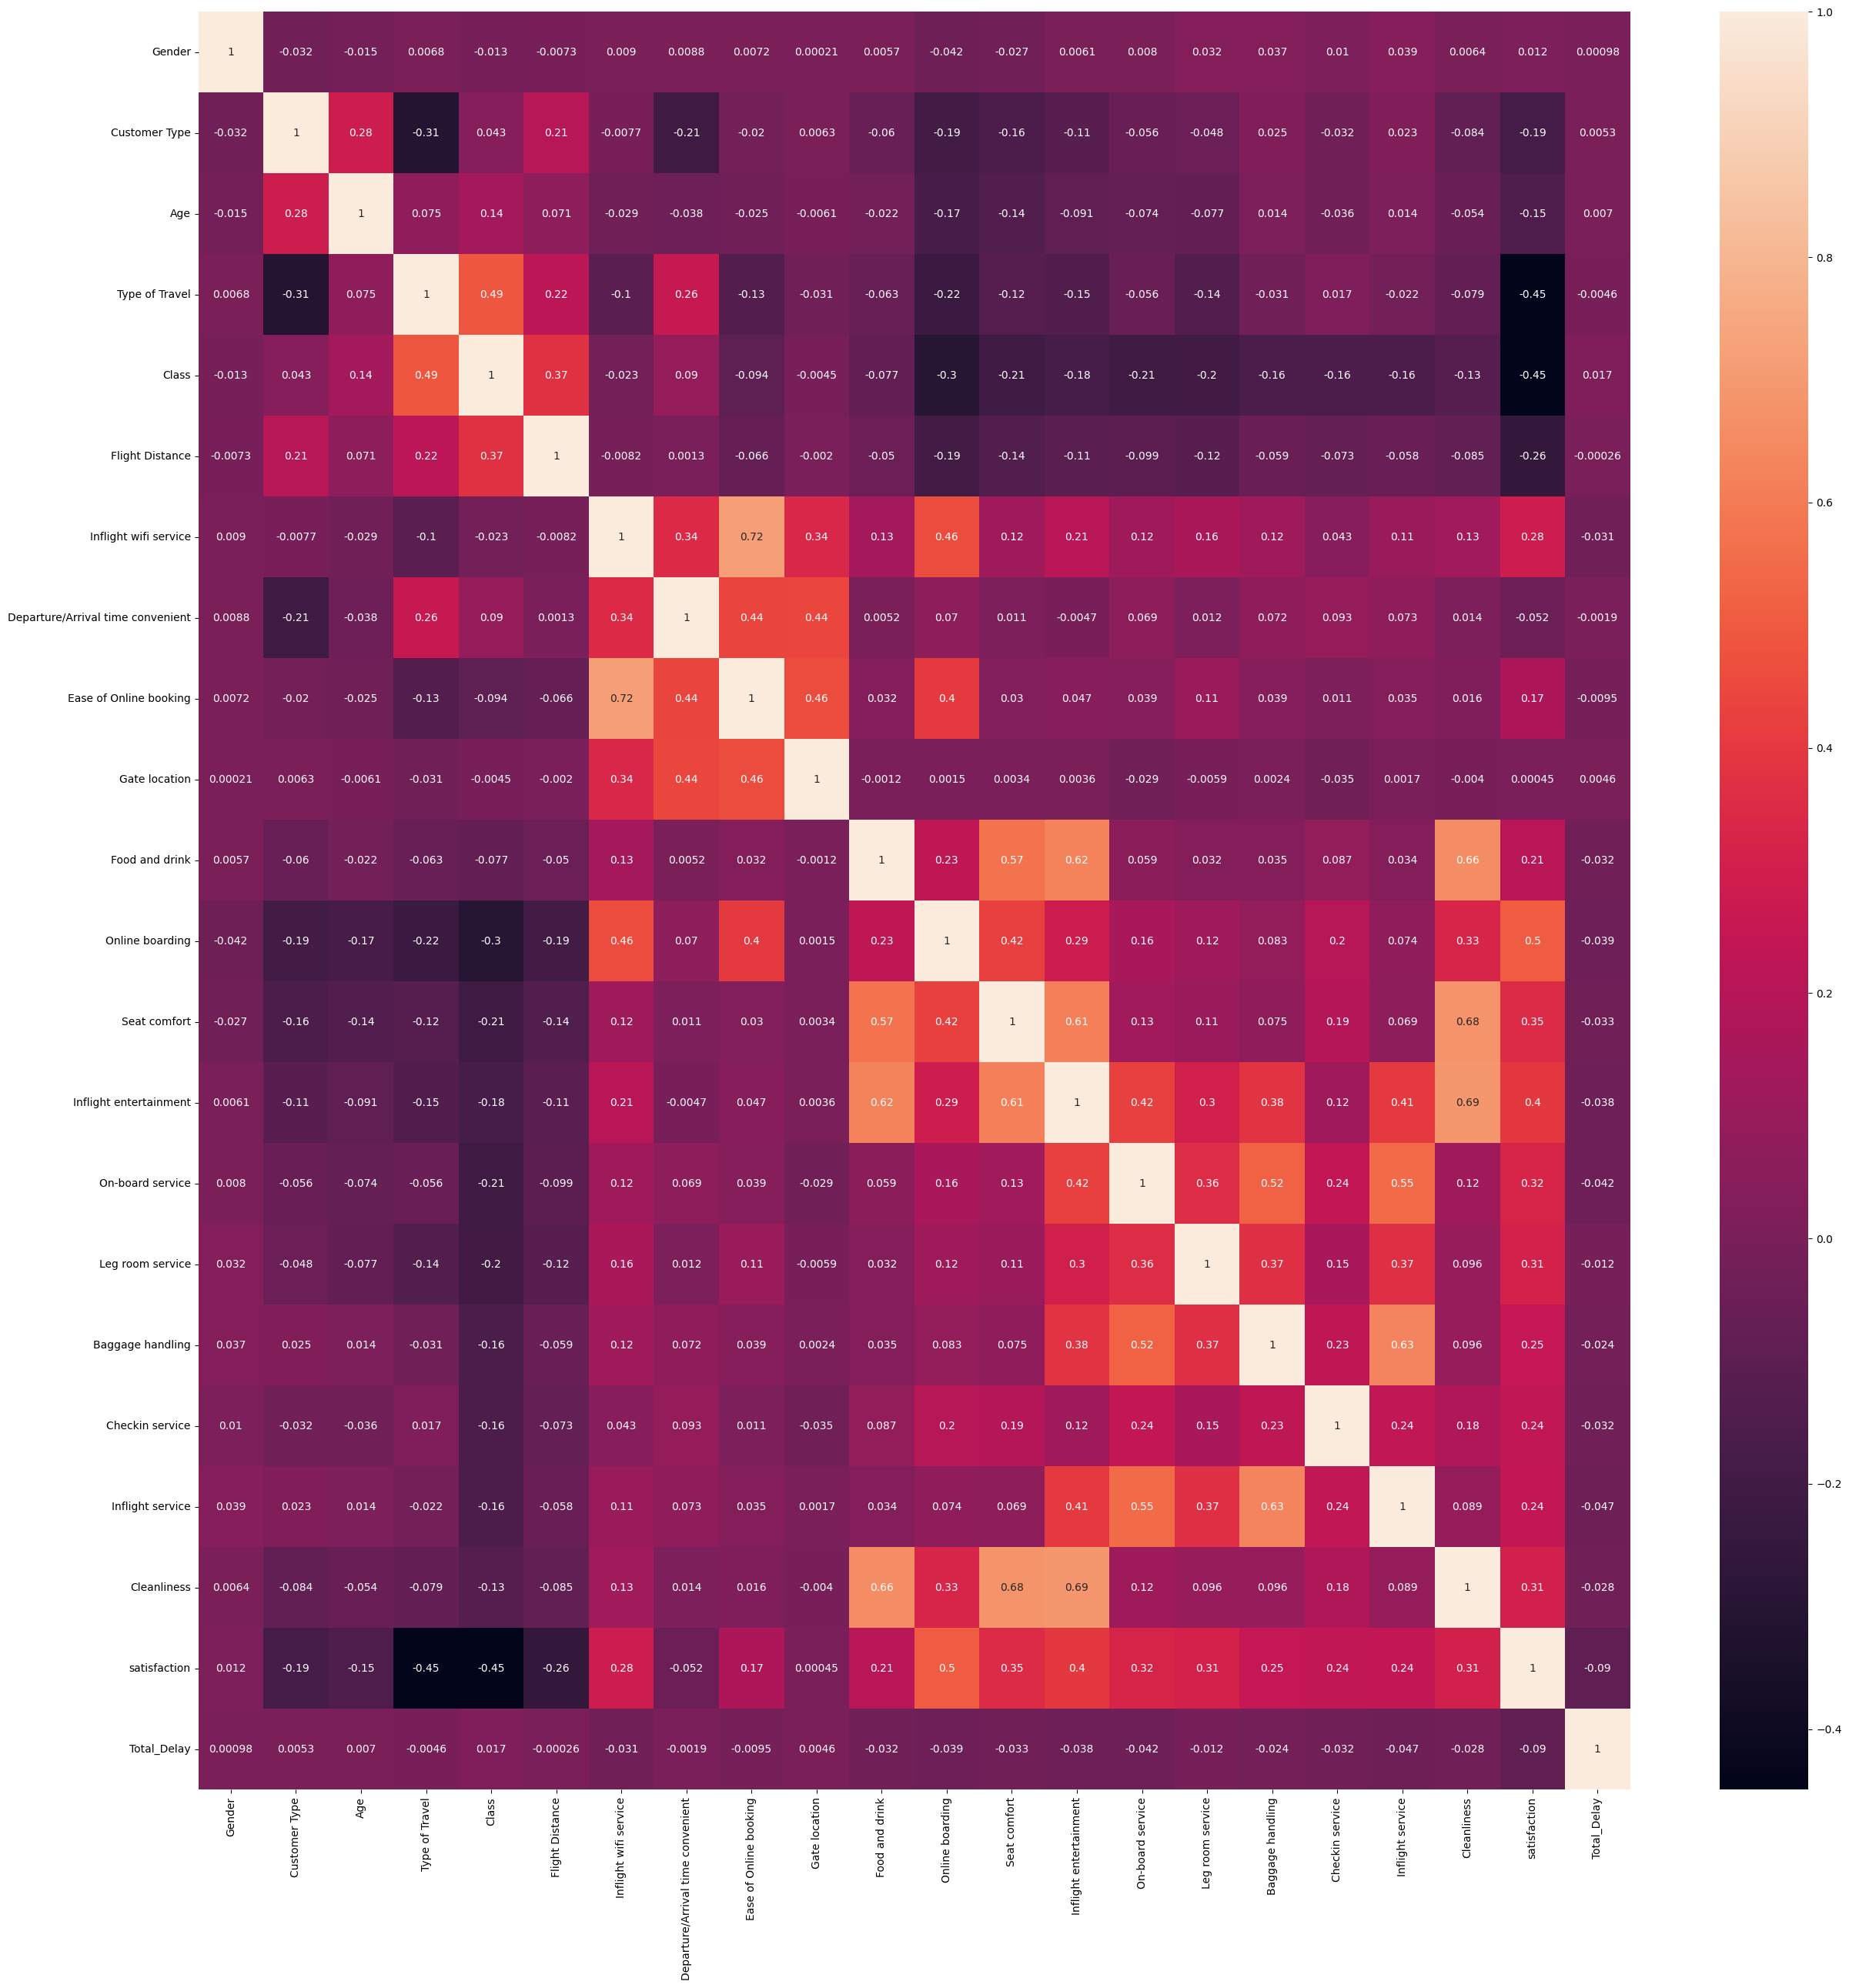

In [31]:
#making correlation on the data
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df.corr(),annot = True, ax =ax)

In [32]:
#knowing how many columns have high or low or bad correlation

high_corr = []
low_corr = []
bad_corr = []
for col in df.columns:
 relation =df["satisfaction"].corr(df[col])
 if(relation > 0):
    if relation >= 0.25 and relation <= 1 :

      high_corr.append(col)
    elif relation >= 0.05 and relation < 0.25 :

      low_corr.append(col)
    else: bad_corr.append(col)
 else:
    if relation <= -0.25 and relation > -1 :

      high_corr.append(col)
    elif relation <= -0.05 and relation > -0.25 :

      low_corr.append(col)
    else: bad_corr.append(col)

print(f"the high corr are {high_corr}")
print(f"the low corr are {low_corr}")
print(f"the bad corr are {bad_corr}")

the high corr are ['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Cleanliness', 'satisfaction']
the low corr are ['Customer Type', 'Age', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Baggage handling', 'Checkin service', 'Inflight service', 'Total_Delay']
the bad corr are ['Gender', 'Gate location']


from the heat map we will discover that there is some featueres has very low realtion with the target like gate location

In [33]:
df.drop(columns=['Gate location'],inplace=True)
df_test.drop(columns=['Gate location'],inplace=True)

These convert the resampled feature array back into a DataFrame with original column names for easy handling. They also add the target variable satisfaction back to the DataFrame, keeping features and labels together. This makes it simple to continue analysis or modeling on the balanced dataset.

In [34]:
print(df['satisfaction'].value_counts())

satisfaction
0    58697
1    44897
Name: count, dtype: int64


In [35]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X = df.drop(columns=['satisfaction'])
y = df['satisfaction']


smote = SMOTE(sampling_strategy=0.9, random_state=42)


X_resampled, y_resampled = smote.fit_resample(X, y)


df= pd.DataFrame(X_resampled, columns=X.columns)
df['satisfaction'] = y_resampled


print(pd.Series(y_resampled).value_counts())



satisfaction
0    58697
1    52827
Name: count, dtype: int64


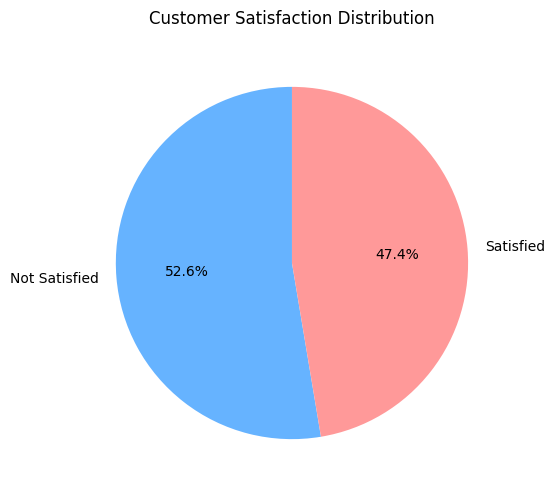

In [36]:
import matplotlib.pyplot as plt

satisfaction_counts = df['satisfaction'].value_counts()


labels = ['Not Satisfied', 'Satisfied']


plt.figure(figsize=(5, 6))
plt.pie(satisfaction_counts.sort_index(), labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Customer Satisfaction Distribution')
plt.axis('equal')
plt.show()

##Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler


features_to_scale = df.columns.difference(['satisfaction'])


scaler = MinMaxScaler()

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])
joblib.dump(scaler, 'minmax_scaler.pkl')

['minmax_scaler.pkl']

In [38]:
print(df)

        Gender  Customer Type       Age  Type of Travel  Class  \
0          1.0            0.0  0.666667             1.0    1.0   
1          1.0            1.0  1.000000             0.0    0.0   
2          0.0            0.0  1.000000             0.0    0.0   
3          0.0            0.0  1.000000             0.0    0.0   
4          1.0            0.0  0.333333             0.0    0.0   
...        ...            ...       ...             ...    ...   
111519     1.0            0.0  0.000000             0.0    0.0   
111520     0.0            0.0  1.000000             0.0    0.0   
111521     0.0            1.0  1.000000             0.0    0.5   
111522     0.0            0.0  0.666667             0.0    0.0   
111523     0.0            0.0  0.000000             1.0    0.0   

        Flight Distance  Inflight wifi service  \
0                   1.0                    0.6   
1                   1.0                    0.6   
2                   0.5                    0.4   
3      

In [39]:
print(df_test)

       Gender  Customer Type       Age  Type of Travel  Class  \
0         0.0            0.0  0.333333             0.0    0.5   
1         0.0            0.0  0.000000             0.0    0.0   
2         1.0            1.0  1.000000             0.0    0.5   
3         1.0            0.0  0.000000             0.0    0.0   
4         0.0            0.0  0.000000             0.0    0.5   
...       ...            ...       ...             ...    ...   
25971     1.0            1.0  0.000000             0.0    0.0   
25972     1.0            0.0  1.000000             0.0    0.0   
25973     0.0            0.0  0.666667             1.0    0.5   
25974     1.0            0.0  0.666667             0.0    0.0   
25975     0.0            0.0  0.000000             1.0    0.5   

       Flight Distance  Inflight wifi service  \
0                  1.0                    1.0   
1                  0.0                    0.2   
2                  1.0                    0.4   
3                  0.0 

#modeling

##logistic regression

In [40]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


X = df.drop('satisfaction', axis=1)
y = df['satisfaction']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


param_grid = {
    'C': [0.01, 0.1, 1, 1.55],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}


grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)


grid.fit(X_train, y_train)


best_model = grid.best_estimator_


print("Best Hyperparameters:", grid.best_params_)


y_val_pred = best_model.predict(X_val)


print("\nAccuracy on Validation Set:", accuracy_score(y_val, y_val_pred))
print("\nConfusion Matrix (Validation):\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report (Validation):\n", classification_report(y_val, y_val_pred))


X_test = df_test.drop('satisfaction', axis=1)
y_test = df_test['satisfaction']

y_test_pred = best_model.predict(X_test)

print("\nAccuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters: {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

Accuracy on Validation Set: 0.8691324815063887

Confusion Matrix (Validation):
 [[10377  1363]
 [ 1556  9009]]

Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.87      0.88      0.88     11740
           1       0.87      0.85      0.86     10565

    accuracy                           0.87     22305
   macro avg       0.87      0.87      0.87     22305
weighted avg       0.87      0.87      0.87     22305


Accuracy on Test Set: 0.8681496929672112

Confusion Matrix (Test):
 [[12867  1661]
 [ 1753  9612]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.88      0.89      0.88     14528
           1       0.85      0.85      0.85     11365

    accuracy                           0.87     25893
   macro avg      

## Random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = df_test[X.columns]
y_test = df_test['satisfaction']


rf_model = RandomForestClassifier(
    n_estimators=75,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)


y_train_pred = rf_model.predict(X_train)

print("Accuracy on Training Set:", accuracy_score(y_train, y_train_pred))

print("Accuracy on Validation Set:", accuracy_score(y_val, y_val_pred))
print("\nConfusion Matrix (Validation):\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report (Validation):\n", classification_report(y_val, y_val_pred))

y_pred = rf_model.predict(X_test)

print("\nAccuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_pred))


Accuracy on Training Set: 0.9632477387103644
Accuracy on Validation Set: 0.9547635059403721

Confusion Matrix (Validation):
 [[11465   370]
 [  639  9831]]

Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     11835
           1       0.96      0.94      0.95     10470

    accuracy                           0.95     22305
   macro avg       0.96      0.95      0.95     22305
weighted avg       0.95      0.95      0.95     22305


Accuracy on Test Set: 0.9558954157494304

Confusion Matrix (Test):
 [[14035   493]
 [  649 10716]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     14528
           1       0.96      0.94      0.95     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.95      0.96     25893
weighted avg       0.96      0.96      0.96     25893



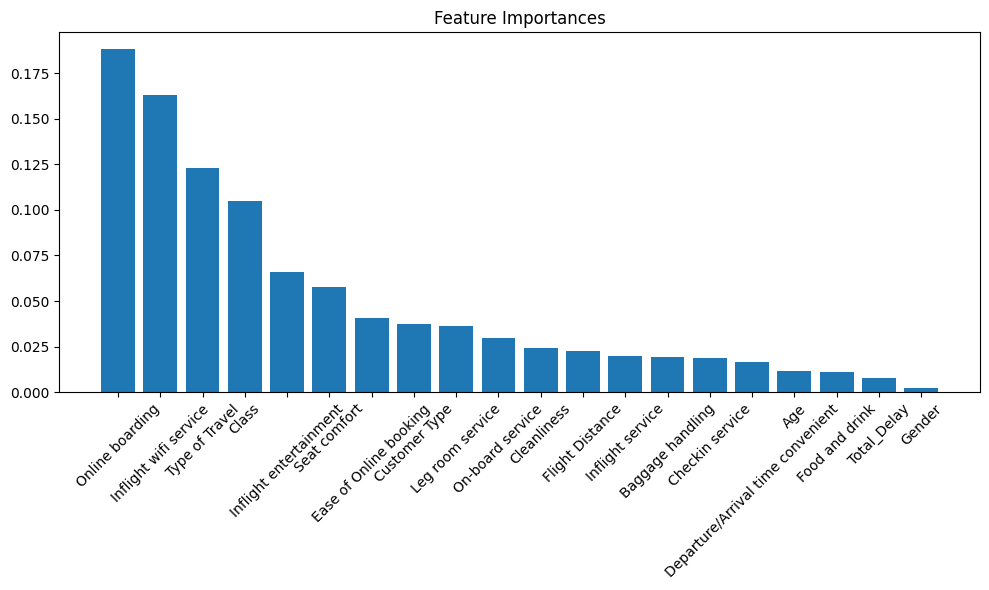

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(20), importances[indices[:20]], align="center")
plt.xticks(range(20), [features[i] for i in indices[:20]], rotation=45)
plt.tight_layout()
plt.show()


##Descion tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df.drop('satisfaction', axis=1)
y = df['satisfaction']


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42 , max_depth=10, min_samples_split=15)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_val)

y_train_pred = tree_model.predict(X_train)

print("Accuracy on Training Set:", accuracy_score(y_train, y_train_pred))

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

X_test = df_test[X.columns]
y_test = df_test['satisfaction']

y_test_pred = tree_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(" Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\n Classification Report:\n", classification_report(y_test, y_test_pred))


Accuracy on Training Set: 0.9507279839496071
Accuracy: 0.9455727415377718

Confusion Matrix:
 [[11235   505]
 [  709  9856]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     11740
           1       0.95      0.93      0.94     10565

    accuracy                           0.95     22305
   macro avg       0.95      0.94      0.95     22305
weighted avg       0.95      0.95      0.95     22305

 Test Accuracy: 0.9462402966052601

 Confusion Matrix:
 [[13918   610]
 [  782 10583]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     14528
           1       0.95      0.93      0.94     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.94      0.95     25893
weighted avg       0.95      0.95      0.95     25893



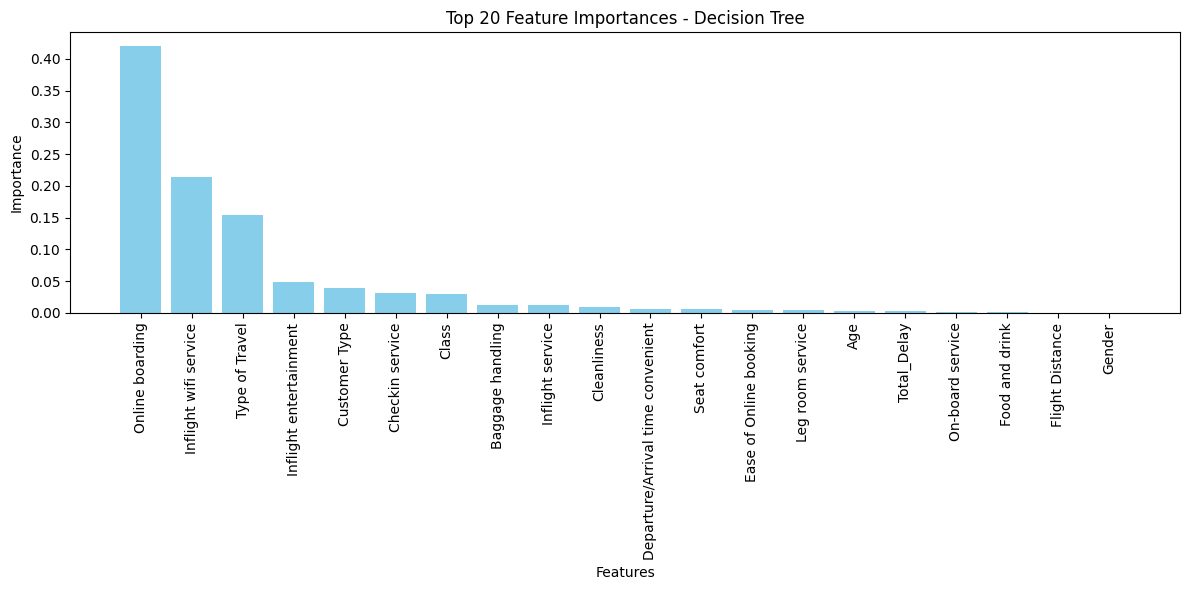

In [44]:
import matplotlib.pyplot as plt
import numpy as np


importances = tree_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]


top_n = 20
plt.figure(figsize=(12, 6))
plt.bar(range(top_n), importances[indices][:top_n], align='center', color='skyblue')
plt.xticks(range(top_n), [features[i] for i in indices[:top_n]], rotation=90)
plt.title("Top 20 Feature Importances - Decision Tree")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [45]:
import joblib
joblib.dump(rf_model, 'random_Model.pkl')

['random_Model.pkl']

##SVM

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train = df.drop('satisfaction', axis=1)
y_train = df['satisfaction']

X_test = df_test.drop('satisfaction', axis=1)
y_test = df_test['satisfaction']

svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc.fit(X_train, y_train)


y_test_pred = svc.predict(X_test)

print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))


Accuracy on Test Set: 0.9504113080755416

Confusion Matrix (Test):
 [[13949   579]
 [  705 10660]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     14528
           1       0.95      0.94      0.94     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.95      0.95     25893
weighted avg       0.95      0.95      0.95     25893



##KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


X_train = df.drop('satisfaction', axis=1)
y_train = df['satisfaction']
X_test  = df_test.drop('satisfaction', axis=1)
y_test  = df_test['satisfaction']


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)


y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)


y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))


Train Accuracy: 0.9438058175818658
Test Accuracy: 0.9260031668790792

Confusion Matrix (Test):
 [[13893   635]
 [ 1281 10084]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     14528
           1       0.94      0.89      0.91     11365

    accuracy                           0.93     25893
   macro avg       0.93      0.92      0.92     25893
weighted avg       0.93      0.93      0.93     25893

